Low Study Hours: [2.5, 1.5, 2.0, 2.5]
Moderate Study Hours: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High Study Hours: [5.5, 6.0]
Days with Low Study Time: 4
Days with Moderate Study Time: 9
Days with High Study Time: 2
Study Minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]
Average Study Hours: 3.70
Average Entertainment Hours: 2.50
Average Sleep Hours: 7.17


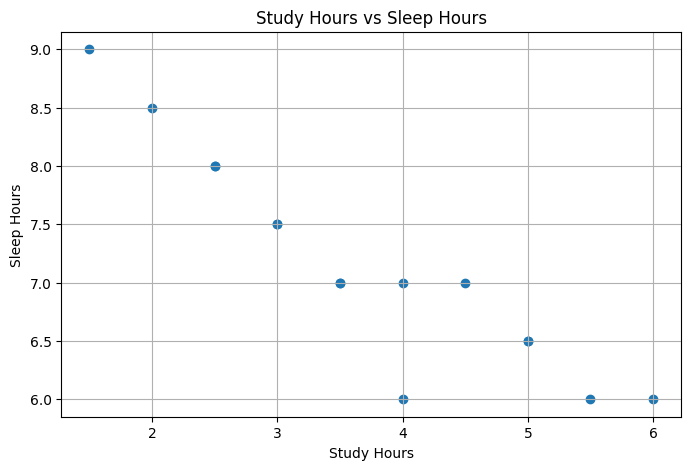

Factorial of 0: 1
Factorial of 5: 120
Factorial of 7: 5040
Error: Factorial is only for non-negative integers.
Minimum coins needed to make 11: 3
LCS length between 'abcde' and 'ace': 3
Maximum value achievable: 9


In [1]:
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

low_study = []
moderate_study = []
high_study = []

for study, _, _ in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

print("Low Study Hours:", low_study)
print("Moderate Study Hours:", moderate_study)
print("High Study Hours:", high_study)

print("Days with Low Study Time:", len(low_study))
print("Days with Moderate Study Time:", len(moderate_study))
print("Days with High Study Time:", len(high_study))

study_minutes = [study * 60 for study, _, _ in time_data]
print("Study Minutes:", study_minutes)

study_hours = [s for s, _, _ in time_data]
entertainment_hours = [e for _, e, _ in time_data]
sleep_hours = [sl for _, _, sl in time_data]

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print(f"Average Study Hours: {avg_study:.2f}")
print(f"Average Entertainment Hours: {avg_entertainment:.2f}")
print(f"Average Sleep Hours: {avg_sleep:.2f}")

import matplotlib.pyplot as plt

study = [s for s, _, _ in time_data]
sleep = [sl for _, _, sl in time_data]

plt.figure(figsize=(8, 5))
plt.scatter(study, sleep, marker='o')
plt.title("Study Hours vs Sleep Hours")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.show()

def factorial(n):
    if n < 0:
        raise ValueError("Factorial is only for non-negative integers.")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

print("Factorial of 0:", factorial(0))
print("Factorial of 5:", factorial(5))
print("Factorial of 7:", factorial(7))

try:
    print("Factorial of -3:", factorial(-3))
except ValueError as e:
    print("Error:", e)

def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    for i in range(1, amount + 1):
        for coin in coins:
            if coin <= i:
                dp[i] = min(dp[i], dp[i - coin] + 1)
    return dp[amount] if dp[amount] != float('inf') else -1

print("Minimum coins needed to make 11:", min_coins([1, 2, 5], 11))

def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

print("LCS length between 'abcde' and 'ace':", longest_common_subsequence("abcde", "ace"))

def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][capacity]

print("Maximum value achievable:", knapsack([1, 3, 4, 5], [1, 4, 5, 7], 7))
